#Libraries, Dates and Data

This shows how much effect has caused on META stock price by data usage scandal that has broke out from March 2018 to July 2024 before lawsuit has happened

In [68]:
#installing libraries
#!pip install yfinance
#!pip install tfcausalimpact

In [2]:
#import libraries
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#Dates
start = "2015-12-28"
training_end = "2018-03-05"
treatment_start = "2018-03-12"
treatment_end = "2018-07-16"
end_stock = "2018-07-17"

In [29]:
#Download VW stock
y = ["VOW.DE"]
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = "1wk")
y = y['Adj Close'].rename("y")
y.head(1)

[*********************100%%**********************]  1 of 1 completed


Date
2014-01-01    116.672958
Name: y, dtype: float64

In [77]:
#Dowload the control groups
stocks = ["META", "DIS", "NVS", "MCD"]
X = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = "1wk")
X = X.iloc[:,:len(stocks)]
X.columns = X.columns.droplevel()
X.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,DIS,MCD,META,NVS
Date,,,,
2014-01-06,68.839661,72.664146,57.821182,48.912109
2014-01-13,67.552177,72.004272,56.184544,48.815895
2014-01-20,66.401642,71.625023,54.338337,48.010124
2014-01-27,66.301201,71.427803,62.441685,47.547100
2014-02-03,69.095329,72.755180,64.188103,48.659550


#Correlation Matrix

In [78]:
#Subset the training data
df_training = X[X.index <= "2018-07-16"]
df_training.tail()

Ticker,DIS,MCD,META,NVS
Date,,,,
2018-06-18,102.606850,143.026993,201.326294,53.551937
2018-06-25,101.130547,136.195099,193.921509,53.894402
2018-07-02,101.101624,138.567993,202.813217,55.057327
2018-07-09,106.991539,137.777023,206.894852,56.205990
2018-07-16,107.283333,138.854858,209.559372,56.148914


In [79]:
df_training.corr().style.background_gradient(cmap='Blues')

Ticker,DIS,MCD,META,NVS
Ticker,,,,
DIS,1.000000,0.539927,0.615688,0.314453
MCD,0.539927,1.000000,0.967516,-0.066291
META,0.615688,0.967516,1.000000,-0.048328
NVS,0.314453,-0.066291,-0.048328,1.000000


In [80]:
#Preparing final df
df_final = df_training[["META", "MCD"]]
df_final.head()

Ticker,META,MCD
Date,,
2014-01-06,57.821182,72.664146
2014-01-13,56.184544,72.004272
2014-01-20,54.338337,71.625023
2014-01-27,62.441685,71.427803
2014-02-03,64.188103,72.755180


In [81]:
df_final=df_final.dropna()

#Google Causal Impact

In [82]:
#Get first and last date
print(df_final.head(1))
print(df_final.tail(10))

Ticker           META        MCD
Date                            
2014-01-06  57.821182  72.664146
Ticker            META         MCD
Date                              
2018-05-14  182.305374  139.040726
2018-05-21  184.540771  140.966827
2018-05-28  193.592178  137.468781
2018-06-04  188.712219  146.816727
2018-06-11  195.448364  144.687210
2018-06-18  201.326294  143.026993
2018-06-25  193.921509  136.195099
2018-07-02  202.813217  138.567993
2018-07-09  206.894852  137.777023
2018-07-16  209.559372  138.854858


In [83]:
#Dates
start = "2015-12-28"
training_end = "2018-03-05"
treatment_start = "2018-03-12"
treatment_end = "2018-07-16"
end_stock = "2018-07-17"

In [84]:
#Define Pre and Post Period
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [85]:
#CI
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

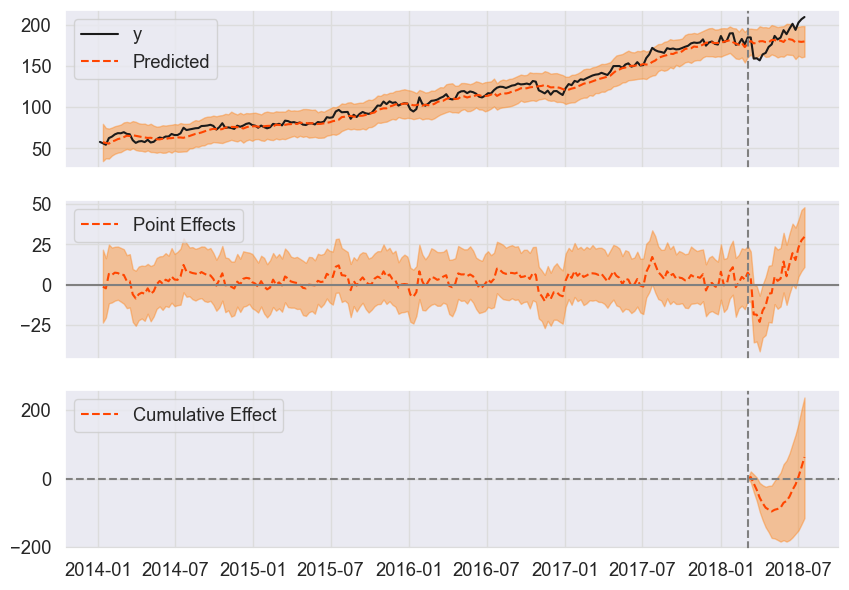

In [86]:
#Output
impact.plot()

The scadal initially had negative impact on stock price but gradually turned into positive effect

In [87]:
#summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    183.44             3485.44
Prediction (s.d.)         180.15 (4.85)      3422.85 (92.1)
95% CI                    [170.57, 189.57]   [3240.76, 3601.77]

Absolute effect (s.d.)    3.29 (4.85)        62.59 (92.1)
95% CI                    [-6.12, 12.88]     [-116.33, 244.68]

Relative effect (s.d.)    1.83% (2.69%)      1.83% (2.69%)
95% CI                    [-3.4%, 7.15%]     [-3.4%, 7.15%]

Posterior tail-area probability p: 0.25
Posterior prob. of a causal effect: 75.02%

For more details run the command: print(impact.summary('report'))


In [89]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 183.44. In the absence of an
intervention, we would have expected an average response of 180.15.
The 95% interval of this counterfactual prediction is [170.57, 189.57].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 3.29 with a 95% interval of
[-6.12, 12.88]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3485.44.
Had the intervention not taken place, we would have expected
a sum of 3422.85. The 95% interval of this prediction is [3240.76, 3601.77].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increa